## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  92.881614   893.203832  0.059038   8.163015   106.926061
1  65.507874  1716.513330  0.163684  10.660487   288.496649
2  22.651964  1660.676395  0.983269   2.880591  1633.136969
3  70.413195   887.887444  0.909704  10.204663   810.757872
4  17.999376  1686.171535  0.195800   9.402942   330.487227


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9342408	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9241349	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9139997	total: 59ms	remaining: 19.6s
3:	learn: 0.9055235	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8940161	total: 60ms	remaining: 11.9s
5:	learn: 0.8853770	total: 60.5ms	remaining: 10s
6:	learn: 0.8732528	total: 60.9ms	remaining: 8.63s
7:	learn: 0.8643035	total: 61.3ms	remaining: 7.6s
8:	learn: 0.8517943	total: 61.8ms	remaining: 6.8s
9:	learn: 0.8406842	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8299842	total: 62.9ms	remaining: 5.66s
11:	learn: 0.8179386	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8067387	total: 64ms	remaining: 4.86s
13:	learn: 0.7961568	total: 64.6ms	remaining: 4.55s
14:	learn: 0.7863310	total: 65ms	remaining: 4.27s
15:	learn: 0.7779161	total: 65.5ms	remaining: 4.03s
16:	learn: 0.7695413	total: 66.3ms	remaining: 3.83s
17:	learn: 0.7605232	total: 66.9ms	remaining: 3.65s
18:	learn: 0.7534949	total: 67.6ms	remaining: 3.49s
19:	

54:	learn: 0.5022566	total: 84.8ms	remaining: 1.46s
55:	learn: 0.4963033	total: 85.4ms	remaining: 1.44s
56:	learn: 0.4924248	total: 85.9ms	remaining: 1.42s
57:	learn: 0.4876214	total: 86.5ms	remaining: 1.4s
58:	learn: 0.4820764	total: 87ms	remaining: 1.39s
59:	learn: 0.4763720	total: 87.4ms	remaining: 1.37s
60:	learn: 0.4710131	total: 88.1ms	remaining: 1.35s
61:	learn: 0.4660533	total: 88.7ms	remaining: 1.34s
62:	learn: 0.4610993	total: 89.2ms	remaining: 1.33s
63:	learn: 0.4570797	total: 89.7ms	remaining: 1.31s
64:	learn: 0.4512051	total: 90.3ms	remaining: 1.3s
65:	learn: 0.4471459	total: 90.6ms	remaining: 1.28s
66:	learn: 0.4421811	total: 91.1ms	remaining: 1.27s
67:	learn: 0.4369564	total: 91.6ms	remaining: 1.25s
68:	learn: 0.4328082	total: 92.1ms	remaining: 1.24s
69:	learn: 0.4273223	total: 92.6ms	remaining: 1.23s
70:	learn: 0.4223299	total: 93ms	remaining: 1.22s
71:	learn: 0.4170516	total: 93.5ms	remaining: 1.21s
72:	learn: 0.4135280	total: 94ms	remaining: 1.19s
73:	learn: 0.4098415

234:	learn: 0.1132819	total: 169ms	remaining: 550ms
235:	learn: 0.1128972	total: 170ms	remaining: 549ms
236:	learn: 0.1123463	total: 170ms	remaining: 547ms
237:	learn: 0.1115970	total: 170ms	remaining: 546ms
238:	learn: 0.1109395	total: 171ms	remaining: 544ms
239:	learn: 0.1104328	total: 171ms	remaining: 543ms
240:	learn: 0.1100203	total: 172ms	remaining: 541ms
241:	learn: 0.1095696	total: 172ms	remaining: 540ms
242:	learn: 0.1087270	total: 173ms	remaining: 538ms
243:	learn: 0.1083082	total: 173ms	remaining: 537ms
244:	learn: 0.1078174	total: 174ms	remaining: 535ms
245:	learn: 0.1074972	total: 174ms	remaining: 533ms
246:	learn: 0.1068633	total: 174ms	remaining: 532ms
247:	learn: 0.1062308	total: 175ms	remaining: 530ms
248:	learn: 0.1055820	total: 175ms	remaining: 529ms
249:	learn: 0.1048402	total: 176ms	remaining: 528ms
250:	learn: 0.1044890	total: 176ms	remaining: 526ms
251:	learn: 0.1041434	total: 177ms	remaining: 524ms
252:	learn: 0.1037133	total: 177ms	remaining: 522ms
253:	learn: 

426:	learn: 0.0462829	total: 266ms	remaining: 357ms
427:	learn: 0.0459408	total: 266ms	remaining: 356ms
428:	learn: 0.0457144	total: 267ms	remaining: 355ms
429:	learn: 0.0456033	total: 267ms	remaining: 354ms
430:	learn: 0.0455043	total: 268ms	remaining: 353ms
431:	learn: 0.0454068	total: 268ms	remaining: 352ms
432:	learn: 0.0452638	total: 268ms	remaining: 352ms
433:	learn: 0.0451578	total: 269ms	remaining: 351ms
434:	learn: 0.0448260	total: 269ms	remaining: 350ms
435:	learn: 0.0447531	total: 270ms	remaining: 349ms
436:	learn: 0.0444564	total: 270ms	remaining: 348ms
437:	learn: 0.0443245	total: 270ms	remaining: 347ms
438:	learn: 0.0441947	total: 271ms	remaining: 346ms
439:	learn: 0.0441241	total: 271ms	remaining: 345ms
440:	learn: 0.0440451	total: 272ms	remaining: 344ms
441:	learn: 0.0438305	total: 272ms	remaining: 344ms
442:	learn: 0.0437535	total: 273ms	remaining: 343ms
443:	learn: 0.0434394	total: 273ms	remaining: 342ms
444:	learn: 0.0432543	total: 274ms	remaining: 341ms
445:	learn: 

606:	learn: 0.0240750	total: 349ms	remaining: 226ms
607:	learn: 0.0239906	total: 349ms	remaining: 225ms
608:	learn: 0.0238042	total: 350ms	remaining: 224ms
609:	learn: 0.0237435	total: 350ms	remaining: 224ms
610:	learn: 0.0236843	total: 351ms	remaining: 223ms
611:	learn: 0.0236266	total: 351ms	remaining: 223ms
612:	learn: 0.0234909	total: 352ms	remaining: 222ms
613:	learn: 0.0233707	total: 352ms	remaining: 221ms
614:	learn: 0.0231923	total: 352ms	remaining: 221ms
615:	learn: 0.0231367	total: 353ms	remaining: 220ms
616:	learn: 0.0230770	total: 353ms	remaining: 219ms
617:	learn: 0.0229859	total: 354ms	remaining: 219ms
618:	learn: 0.0228706	total: 354ms	remaining: 218ms
619:	learn: 0.0227818	total: 355ms	remaining: 217ms
620:	learn: 0.0226111	total: 355ms	remaining: 217ms
621:	learn: 0.0225583	total: 356ms	remaining: 216ms
622:	learn: 0.0224475	total: 356ms	remaining: 215ms
623:	learn: 0.0223622	total: 357ms	remaining: 215ms
624:	learn: 0.0221976	total: 357ms	remaining: 214ms
625:	learn: 

816:	learn: 0.0116634	total: 445ms	remaining: 99.6ms
817:	learn: 0.0115900	total: 445ms	remaining: 99.1ms
818:	learn: 0.0115835	total: 446ms	remaining: 98.5ms
819:	learn: 0.0115248	total: 446ms	remaining: 97.9ms
820:	learn: 0.0114796	total: 447ms	remaining: 97.4ms
821:	learn: 0.0114223	total: 447ms	remaining: 96.8ms
822:	learn: 0.0114091	total: 447ms	remaining: 96.2ms
823:	learn: 0.0113653	total: 448ms	remaining: 95.6ms
824:	learn: 0.0113523	total: 448ms	remaining: 95.1ms
825:	learn: 0.0113461	total: 449ms	remaining: 94.5ms
826:	learn: 0.0113023	total: 449ms	remaining: 94ms
827:	learn: 0.0112324	total: 450ms	remaining: 93.4ms
828:	learn: 0.0112198	total: 450ms	remaining: 92.9ms
829:	learn: 0.0112075	total: 451ms	remaining: 92.3ms
830:	learn: 0.0112015	total: 451ms	remaining: 91.8ms
831:	learn: 0.0111895	total: 452ms	remaining: 91.2ms
832:	learn: 0.0111339	total: 452ms	remaining: 90.6ms
833:	learn: 0.0110663	total: 453ms	remaining: 90.1ms
834:	learn: 0.0110545	total: 453ms	remaining: 89

996:	learn: 0.0066673	total: 527ms	remaining: 1.59ms
997:	learn: 0.0066529	total: 528ms	remaining: 1.06ms
998:	learn: 0.0066390	total: 528ms	remaining: 528us
999:	learn: 0.0066015	total: 529ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

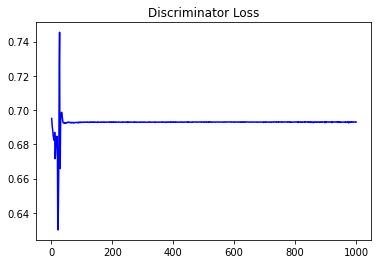

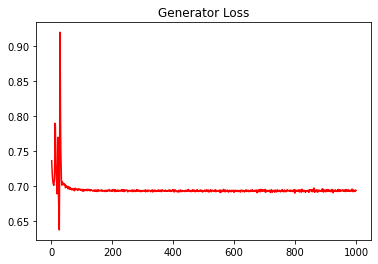

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.014968481954638785


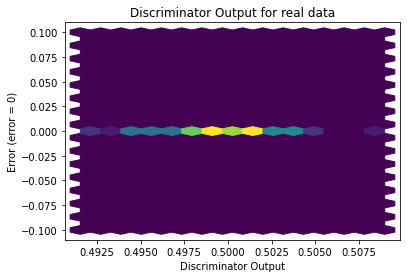

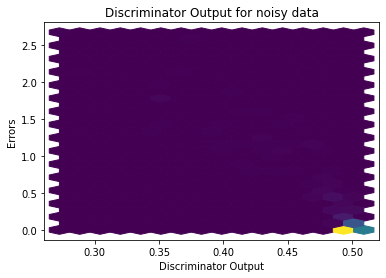

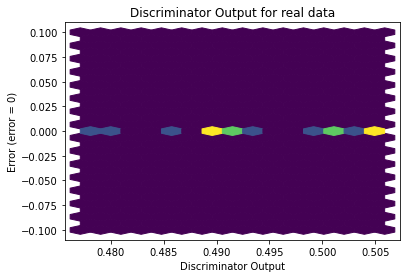

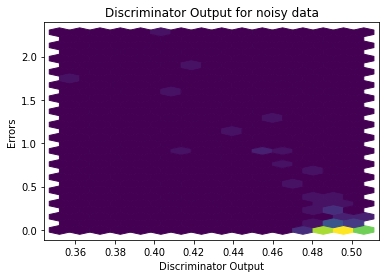

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


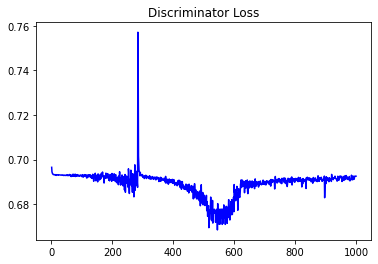

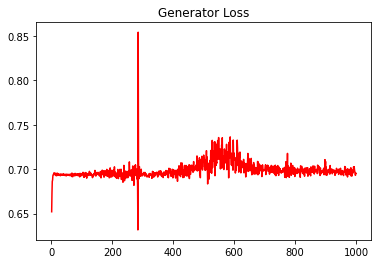

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.00988783263871593


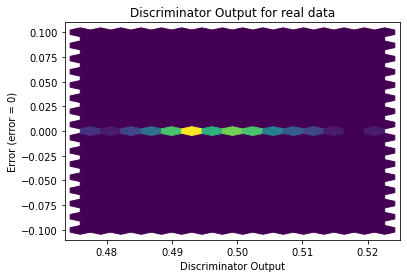

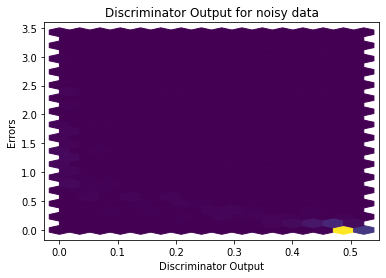

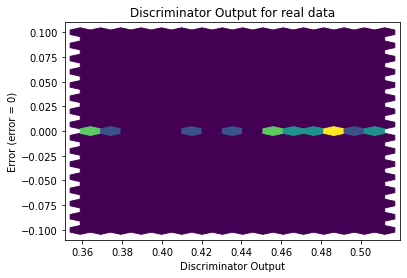

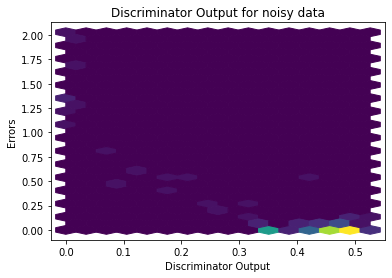

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0905]], requires_grad=True)
